<a href="https://colab.research.google.com/github/seyed-mohammadreza-mousavi/wwa/blob/main/1_pso_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function
def objective_function(x):
    return np.sin(x)

# Define the PSO algorithm
def particle_swarm_optimization(objective_func, num_particles, num_iterations):
    # Initialize particles' positions and velocities
    positions = np.random.uniform(low=-10, high=10, size=(num_particles,))
    velocities = np.random.uniform(low=-1, high=1, size=(num_particles,))

    # Initialize global best position and corresponding value
    global_best_pos = positions[0]
    global_best_val = objective_func(global_best_pos)

    # Initialize lists to store best positions and values at each iteration
    best_positions = [global_best_pos]
    best_values = [global_best_val]

    # PSO main loop
    for _ in range(num_iterations):
        for i in range(num_particles):
            # Update particle's velocity
            velocities[i] = velocities[i] + 2 * np.random.random() * (best_positions[-1] - positions[i]) \
                            + 2 * np.random.random() * (global_best_pos - positions[i])

            # Update particle's position
            positions[i] = positions[i] + velocities[i]

            # Update global best position and value
            particle_val = objective_func(positions[i])
            if particle_val < global_best_val:
                global_best_pos = positions[i]
                global_best_val = particle_val

        # Store best position and value at each iteration
        best_positions.append(global_best_pos)
        best_values.append(global_best_val)

    return best_positions, best_values

# User-defined objective function
def new_objective_function(x):
    return x**(3/2)

In [2]:
# Example usage
num_particles = 200
num_iterations = 50

best_positions, best_values = particle_swarm_optimization(new_objective_function, num_particles, num_iterations)

<ipython-input-1-78cf9f273dec>:46: RuntimeWarning: invalid value encountered in double_scalars
  return x**(3/2)


Best Solutions:


<ipython-input-1-78cf9f273dec>:46: RuntimeWarning: invalid value encountered in power
  return x**(3/2)


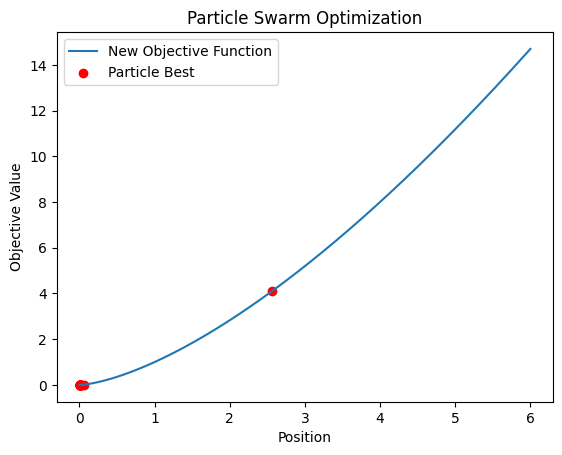

In [3]:
# Print the best solutions
print("Best Solutions:")
#for i, pos in enumerate(best_positions):
#    print(f"Iteration {i + 1}: {pos}")

# Plotting the optimization process
x = np.linspace(-6, 6, 100000)
y_obj = objective_function(x)
y_new_obj = new_objective_function(x)

#plt.plot(x, y_obj, label="Original Objective Function")
plt.plot(x, y_new_obj, label="New Objective Function")
plt.scatter(best_positions, best_values, c='r', label="Particle Best")
plt.xlabel("Position")
plt.ylabel("Objective Value")
plt.title("Particle Swarm Optimization")
plt.legend()
plt.show()